# Início

Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Ler CVS do GitHub

In [ ]:
url = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/df_com_outliers.csv'
df = pd.read_csv(url)

Uma vez que iremos proceder a uma Análise de Dados empregando técnicas de clustering e que clusters são extremamente sensíveis a outliers, optamos pela versão do dataset que não leva outliers: ```df_com_outliers.csv```

Queremos que os dados estejam no melhor formato possível para que sejam aplicadas as técnicas. Comecemos por criar uma cópia do dataset onde não serão incluídas as datas.

In [ ]:
df_cluster = df.copy()

df_cluster = df_cluster.drop(['DataDiagnostico','DataFinal'],axis=1)

Vamos começar por tratar das nossas variáveis binárias substituindo os seus valores por **0** e por **1**.

In [ ]:
df_cluster = df_cluster.replace(['Cura','M','Não'],0)
df_cluster = df_cluster.replace(['Óbito pelo COVID-19','F','Sim'],1)

Temos agora ainda 3 varáveis que precisamos de tratar:
* 1 variável categórica - Etnia
* 2 variáveis numéricas - Nº dias e Idade

Relativamente à variável categórica vamos fazer one-hot encoding.

In [ ]:
df_cluster = pd.get_dummies(df_cluster, columns = ['RacaCor'])

Vamos agora pôr a variável ```Idade```em faixa etária, em intervalos de 10 anos.

In [ ]:
def get_age_interval(age):
    
    interval_start = (age // 10) * 10
    
    return interval_start

df_cluster['FaixaEtaria'] = df_cluster['Idade'].apply(get_age_interval)
df_cluster = df_cluster.drop(['Idade'],axis=1)

Agora vamos tratar da variável ```NumDias``` em que a vamos também colocar em intervalos de 5 dias, i.e., se aparecer 5, significa que levou no **máximo** até 5 dias a ter alta, se tiver 10, significa que levou no **máximo** até 10 dias a ter alta e por aí em diante.

In [ ]:
def get_upper_bound(num_days):
    if num_days % 5 == 0:
        return num_days
    
    return ((num_days // 5) + 1) * 5

df_cluster['DuracaoDoenca'] = df_cluster['NumDias'].apply(get_upper_bound)
df_cluster = df_cluster.drop(['NumDias'],axis = 1)

In [ ]:
df_cluster

,Evolucao,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,...,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,RacaCor_Amarela,RacaCor_Branca,RacaCor_Indigena,RacaCor_Parda,RacaCor_Preta,FaixaEtaria,DuracaoDoenca
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,20,15
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,20,10
2,0,0,1,0,1,1,1,0,1,0,...,0,0,0,0,1,0,0,0,30,10
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,20,10
4,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184896,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,50,30
184897,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,20,35
184898,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,40,30
184899,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,50,35


Vamos guardar uma versão do dataframe já prontinho para ser usado por qualquer cluster

In [86]:
df_cluster.to_csv("df_binario.csv", encoding='utf-8')

# Clustering

Ambicionavamos aplicar diferentes técnicas de clustering ao dataset para podermos comparar os resultados obtidos, no entanto dada a elevada dimensaão do dataset de trabalho, tal não será possível. Pelo que para diferentes técnicas, teremos de usar diferentes versões do dataset de trabalho.

## K-Means

Dadas as limitações impostas pela máquina em que corremos o código e pelo tamanho elevado do nosso dataset, vamos apenas aplicar ```K-means``` à totalidade do dataset (todas as entradas) em três versões distintas:
* df_completo - com todas as features
* df_sintomas - com todos os sintomas
* df_comorbilidades - com todas as comorbilidades
* df_caracteristicas - com sintomas e comorbilidades



In [ ]:
df_completo = df_cluster.copy()

df_sintomas = df_cluster.loc[:,['Febre',
                                'DificuldadeRespiratoria',
                                'Tosse','Coriza','DorGarganta',
                                'Diarreia','Cefaleia']]

df_comorbilidades = df_cluster.loc[:,['ComorbidadePulmao',
                                      'ComorbidadeCardio',
                                      'ComorbidadeRenal',
                                      'ComorbidadeDiabetes',
                                      'ComorbidadeTabagismo',
                                      'ComorbidadeObesidade']]

df_caracteristicas = df_cluster.loc[:,['Febre',
                                       'DificuldadeRespiratoria',
                                       'Tosse','Coriza','DorGarganta',
                                       'Diarreia','Cefaleia',
                                       'ComorbidadePulmao',
                                       'ComorbidadeCardio',
                                       'ComorbidadeRenal',
                                       'ComorbidadeDiabetes',
                                       'ComorbidadeTabagismo',
                                       'ComorbidadeObesidade']]

### df_completo

In [ ]:
def optimal_num_clusters(X,upper_bound):
    wcss = []
    for i in range(1,upper_bound):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1
    return elbow_index

for i in range(3):
  num = ((i+1)*10 +1)
  opt_clusters = optimal_num_clusters(df_completo,num)
  print('Optimal number of clusters with (1,{}) range: '.format(num), opt_clusters)

Optimal number of clusters with (1,11) range:  2
Optimal number of clusters with (1,21) range:  2
Optimal number of clusters with (1,31) range:  2


In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_completo)

#view cluster assignments for each observation
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_completo['kmeans_cluster'] = kmeans.labels_
df_completo

,Evolucao,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,...,FicouInternado,ProfissionalSaude,RacaCor_Amarela,RacaCor_Branca,RacaCor_Indigena,RacaCor_Parda,RacaCor_Preta,FaixaEtaria,DuracaoDoenca,kmeans_cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,20,15,1
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,20,10,1
2,0,0,1,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,30,10,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,20,10,1
4,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184896,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,50,30,1
184897,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,1,0,20,35,1
184898,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,40,30,1
184899,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,50,35,1


In [ ]:
lista_clusters = []
total_pessoas = len(df_completo)
for i in range(2):
  num_pessoas = len(df_completo[df_completo['kmeans_cluster'] == (i)])
  frase = '{}% de pesssoas pertencem ao cluster {}.'.format(round((num_pessoas/total_pessoas)*100,2),i)
  lista_clusters.append(frase)

In [ ]:
lista_clusters

['3.29% de pesssoas pertencem ao cluster 0.',
 '96.71% de pesssoas pertencem ao cluster 1.']

In [ ]:
# 3.29% 
df_completo_cluster_zero = df_completo[df_completo['kmeans_cluster']==0]
df_completo_cluster_zero = df_completo_cluster_zero.reset_index()

# 96.71%
df_completo_cluster_um = df_completo[df_completo['kmeans_cluster']==1]
df_completo_cluster_um = df_completo_cluster_um.reset_index()


In [ ]:
df_completo_cluster_zero

,index,Evolucao,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,...,FicouInternado,ProfissionalSaude,RacaCor_Amarela,RacaCor_Branca,RacaCor_Indigena,RacaCor_Parda,RacaCor_Preta,FaixaEtaria,DuracaoDoenca,kmeans_cluster
0,67,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,75,0
1,478,1,0,1,1,1,0,0,0,1,...,1,0,0,1,0,0,0,70,100,0
2,716,0,0,1,0,1,1,1,0,1,...,0,0,0,1,0,0,0,40,380,0
3,1495,0,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,0,50,70,0
4,1498,0,1,0,1,1,1,1,0,1,...,0,0,0,1,0,0,0,40,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6078,184860,1,1,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,50,70,0
6079,184873,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,40,150,0
6080,184878,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,10,450,0
6081,184888,1,0,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,50,65,0


In [ ]:
df_sem_dias_sem_idade_zero = df_completo_cluster_zero.copy()
df_sem_dias_sem_idade_zero = df_sem_dias_sem_idade_zero.drop(['DuracaoDoenca','FaixaEtaria','index','kmeans_cluster'],axis=1)
lol_zero = df_sem_dias_sem_idade_zero.values.tolist()

lol_zero_unique = []
for lista in lol_zero:
  if lista not in lol_zero_unique:
    lol_zero_unique.append(lista)

df_sem_dias_sem_idade_um = df_completo_cluster_um.copy()
df_sem_dias_sem_idade_um = df_sem_dias_sem_idade_um.drop(['DuracaoDoenca','FaixaEtaria','index','kmeans_cluster'],axis=1)
lol_um = df_sem_dias_sem_idade_um.values.tolist()

lol_um_unique = []
for lista in lol_um:
  if lista not in lol_um_unique:
    lol_um_unique.append(lista)

In [ ]:
df_sem_dias_sem_idade_um.columns

Index(['Evolucao', 'Sexo', 'Febre', 'DificuldadeRespiratoria', 'Tosse',
       'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao',
       'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes',
       'ComorbidadeTabagismo', 'ComorbidadeObesidade', 'FicouInternado',
       'ProfissionalSaude', 'RacaCor_Amarela', 'RacaCor_Branca',
       'RacaCor_Indigena', 'RacaCor_Parda', 'RacaCor_Preta'],
      dtype='object')

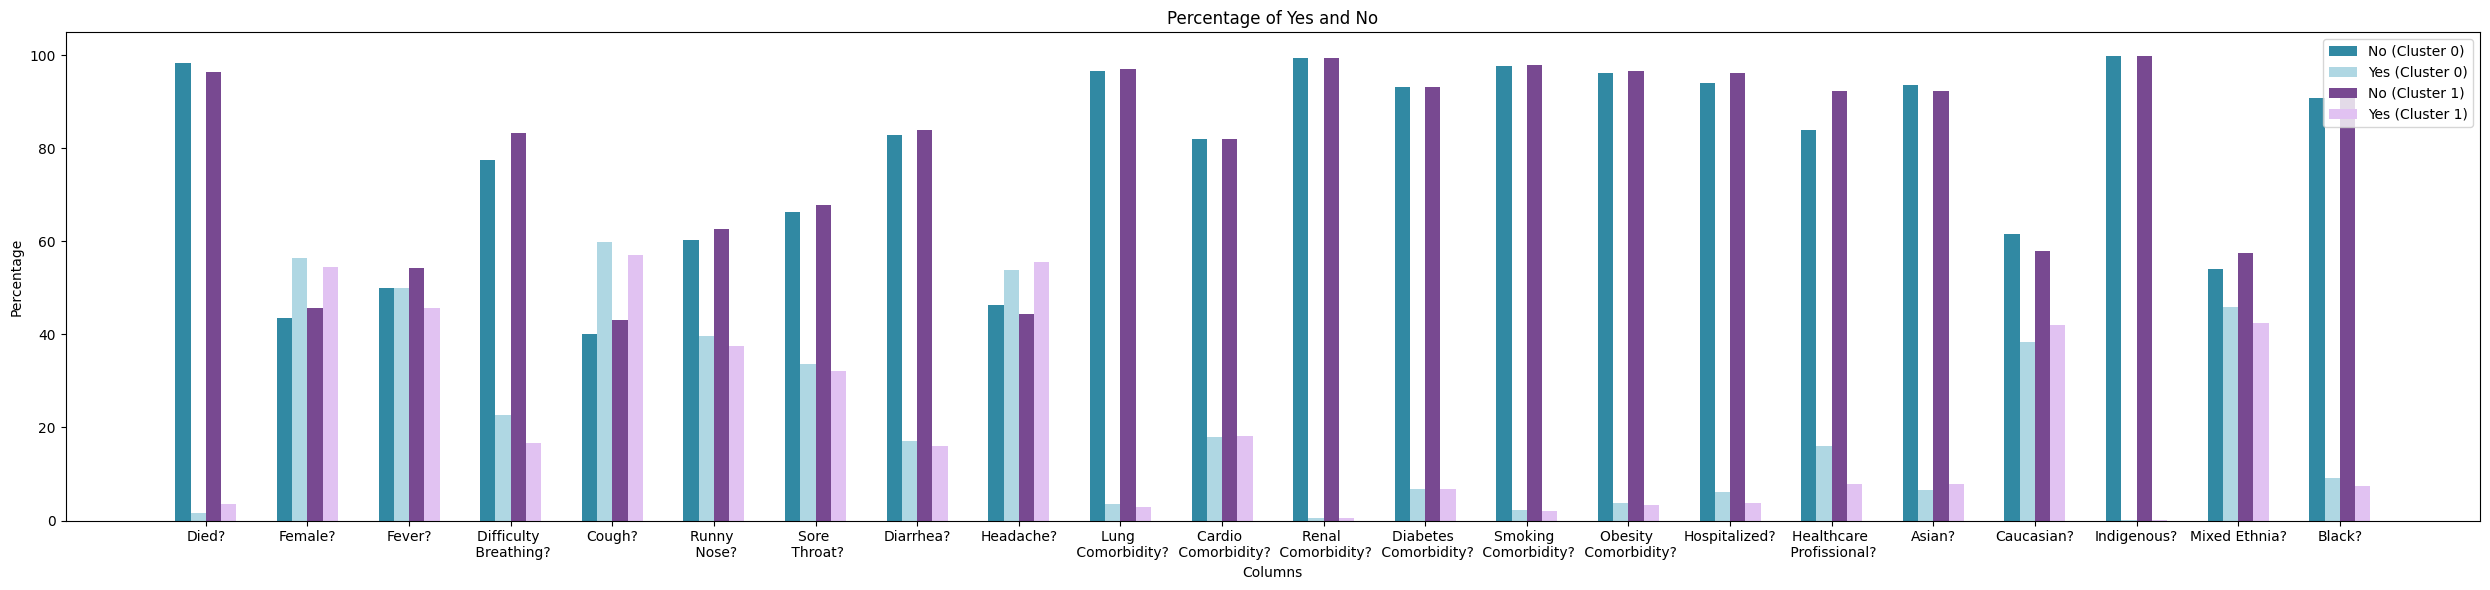

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_binary_matrices(matrix1, matrix2, column_labels):
    # Convert the matrices to NumPy arrays
    binary_array1 = np.array(matrix1)
    binary_array2 = np.array(matrix2)

    # Calculate the percentage of zeros and ones for each column
    total_counts1 = binary_array1.shape[0]
    zero_percentages1 = np.sum(binary_array1 == 0, axis=0) / total_counts1 * 100
    one_percentages1 = np.sum(binary_array1 == 1, axis=0) / total_counts1 * 100

    total_counts2 = binary_array2.shape[0]
    zero_percentages2 = np.sum(binary_array2 == 0, axis=0) / total_counts2 * 100
    one_percentages2 = np.sum(binary_array2 == 1, axis=0) / total_counts2 * 100

    num_columns = binary_array1.shape[1]

    # Create the x-axis values (column indices)
    x = np.arange(num_columns)

    # Set the width of the bars
    bar_width = 0.15

    # Plot the double barplots
    fig, ax = plt.subplots(figsize=(25,6))
    rects1 = ax.bar(x, zero_percentages1, bar_width, color='#3189a3', label='No (Cluster 0)')
    rects2 = ax.bar(x + bar_width, one_percentages1, bar_width, color='#afd7e3', label='Yes (Cluster 0)')

    rects3 = ax.bar(x + 2 * bar_width, zero_percentages2, bar_width, color='#784991', label='No (Cluster 1)')
    rects4 = ax.bar(x + 3 * bar_width, one_percentages2, bar_width, color='#e1c2f2', label='Yes (Cluster 1)')

    # Add labels, title, and legend
    ax.set_xlabel('Columns')
    ax.set_ylabel('Percentage')
    ax.set_title('Percentage of Yes and No')
    ax.set_xticks(x + 1.5 * bar_width)
    ax.set_xticklabels(column_labels)  # Set the column labels here
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


# Example usage
binary_matrix1 = lol_zero

binary_matrix2 = lol_um

column_labels =  ['Died?', 'Female?', 'Fever?', 'Difficulty \n Breathing?', 'Cough?',
                  'Runny \n Nose?', 'Sore \n Throat?', 'Diarrhea?', 'Headache?', 'Lung \n Comorbidity?',
                  'Cardio \n Comorbidity?', 'Renal \n Comorbidity?', 'Diabetes \n Comorbidity?',
                  'Smoking \n Comorbidity?', 'Obesity \n Comorbidity?', 'Hospitalized?',
                  'Healthcare \n Profissional?', 'Asian?', 'Caucasian?',
                  'Indigenous?', 'Mixed Ethnia?', 'Black?'] 

plot_binary_matrices(binary_matrix1, binary_matrix2, column_labels)


## df_sintomas

In [ ]:
def optimal_num_clusters(X,upper_bound):
    wcss = []
    for i in range(1,upper_bound):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1 
    return elbow_index

for i in range(3):
  num = ((i+1)*10 +1)
  opt_clusters = optimal_num_clusters(df_sintomas,num)
  print('Optimal number of clusters with (1,{}) range: '.format(num), opt_clusters)

Optimal number of clusters with (1,11) range:  1
Optimal number of clusters with (1,21) range:  17
Optimal number of clusters with (1,31) range:  22


In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=11, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_sintomas)

#view cluster assignments for each observation
kmeans.labels_

array([2, 0, 0, ..., 4, 0, 2], dtype=int32)

In [ ]:
df_sintomas['kmeans_cluster'] = kmeans.labels_
df_sintomas

,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,kmeans_cluster
0,0,0,0,0,0,0,0,2
1,0,0,0,0,1,0,1,0
2,1,0,1,1,1,0,1,0
3,0,0,1,0,0,0,0,9
4,0,0,1,1,1,0,0,3
...,...,...,...,...,...,...,...,...
152880,0,0,1,1,0,0,0,6
152881,1,1,1,0,0,0,0,10
152882,1,0,1,1,0,0,0,4
152883,1,0,1,1,1,0,1,0


In [ ]:
lista_clusters = []
total_pessoas = len(df_sintomas)
for i in range(11):
  num_pessoas = len(df_sintomas[df_sintomas['kmeans_cluster'] == (i)])
  frase = '{}% de pesssoas pertencem ao cluster {}.'.format(round((num_pessoas/total_pessoas)*100,2),i)
  lista_clusters.append(frase)

In [ ]:
lista_clusters

['13.0% de pesssoas pertencem ao cluster 0.',
 '5.65% de pesssoas pertencem ao cluster 1.',
 '18.1% de pesssoas pertencem ao cluster 2.',
 '9.26% de pesssoas pertencem ao cluster 3.',
 '6.45% de pesssoas pertencem ao cluster 4.',
 '4.35% de pesssoas pertencem ao cluster 5.',
 '10.81% de pesssoas pertencem ao cluster 6.',
 '12.45% de pesssoas pertencem ao cluster 7.',
 '4.02% de pesssoas pertencem ao cluster 8.',
 '9.36% de pesssoas pertencem ao cluster 9.',
 '6.53% de pesssoas pertencem ao cluster 10.']

In [ ]:
# Top-3

# 1º
df_sintomas_cluster_dois = df_sintomas[df_sintomas['kmeans_cluster']==2]
df_sintomas_cluster_dois = df_sintomas_cluster_dois.reset_index()

#2º
df_sintomas_cluster_zero = df_sintomas[df_sintomas['kmeans_cluster']==0]
df_sintomas_cluster_zero = df_sintomas_cluster_zero.reset_index()

#3º
df_sintomas_cluster_sete = df_sintomas[df_sintomas['kmeans_cluster']==7]
df_sintomas_cluster_sete = df_sintomas_cluster_sete.reset_index()



# Bottom-3

# 9º
df_sintomas_cluster_um = df_sintomas[df_sintomas['kmeans_cluster']==1]
df_sintomas_cluster_um = df_sintomas_cluster_um.reset_index()

#10º
df_sintomas_cluster_cinco = df_sintomas[df_sintomas['kmeans_cluster']==5]
df_sintomas_cluster_cinco = df_sintomas_cluster_cinco.reset_index()

#11º
df_sintomas_cluster_oito = df_sintomas[df_sintomas['kmeans_cluster']==8]
df_sintomas_cluster_oito = df_sintomas_cluster_oito.reset_index()

### 1º Lugar - C2

In [ ]:
colunas = list(df_sintomas_cluster_dois.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_dois)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_dois.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_dois = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_dois:
    lista_sintomas_cluster_dois.append(item)

lista_sintomas_cluster_dois

[[0, 0, 0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 1, 0, 2],
 [0, 0, 0, 0, 0, 0, 1, 2],
 [0, 0, 0, 0, 1, 0, 0, 2],
 [0, 1, 0, 0, 0, 0, 1, 2],
 [0, 1, 0, 0, 0, 0, 0, 2],
 [0, 1, 0, 0, 0, 1, 0, 2],
 [0, 0, 0, 0, 1, 1, 0, 2],
 [0, 1, 0, 0, 1, 0, 0, 2]]

### 2º Lugar - C0

In [ ]:
colunas = list(df_sintomas_cluster_zero.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_zero)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_zero.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_zero = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_zero:
    lista_sintomas_cluster_zero.append(item)

lista_sintomas_cluster_zero

[[0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 1, 0, 1, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 1, 0],
 [1, 0, 0, 1, 1, 0, 1, 0]]

### 3º Lugar - C7

In [ ]:
colunas = list(df_sintomas_cluster_sete.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_sete)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_sete.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_sete = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_sete:
    lista_sintomas_cluster_sete.append(item)

lista_sintomas_cluster_sete

[[1, 0, 1, 0, 0, 0, 0, 7],
 [1, 0, 1, 0, 0, 0, 1, 7],
 [1, 0, 1, 0, 0, 1, 0, 7],
 [1, 0, 0, 0, 0, 0, 1, 7],
 [1, 0, 1, 0, 0, 1, 1, 7],
 [1, 0, 0, 0, 0, 1, 1, 7]]

### 9º Lugar (antepenúltimo) - C1

In [ ]:
colunas = list(df_sintomas_cluster_um.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_um)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_um.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_um = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_um:
    lista_sintomas_cluster_um.append(item)

lista_sintomas_cluster_um

[[1, 0, 0, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 1],
 [0, 0, 1, 0, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 0, 1],
 [1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 1, 1, 0, 1],
 [0, 1, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 0, 1],
 [0, 1, 1, 0, 1, 1, 0, 1],
 [0, 1, 0, 1, 1, 1, 1, 1],
 [0, 1, 1, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 1],
 [0, 1, 0, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 1],
 [0, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 0, 1, 1, 1, 1]]

### 10º Lugar (penúltimo) - C5

In [ ]:
colunas = list(df_sintomas_cluster_cinco.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_cinco)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_cinco.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_cinco = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_cinco:
    lista_sintomas_cluster_cinco.append(item)

lista_sintomas_cluster_cinco

[[0, 0, 0, 1, 0, 0, 1, 5],
 [0, 0, 0, 0, 0, 1, 1, 5],
 [1, 0, 0, 1, 0, 1, 1, 5],
 [0, 1, 0, 1, 0, 0, 1, 5],
 [0, 0, 0, 1, 1, 1, 1, 5],
 [0, 0, 0, 1, 0, 1, 1, 5],
 [1, 1, 0, 1, 0, 1, 1, 5],
 [0, 1, 0, 0, 0, 1, 1, 5],
 [0, 1, 0, 1, 0, 1, 1, 5],
 [0, 0, 0, 1, 0, 1, 0, 5],
 [0, 1, 0, 1, 0, 1, 0, 5]]

### 11º Lugar (último) - C8

In [ ]:
colunas = list(df_sintomas_cluster_oito.columns)
colunas = colunas[1:]

lista_de_listas_sintomas =[]
for i in range(len(df_sintomas_cluster_oito)):
  lista_de_sintomas = []
  for col in colunas:
    res = df_sintomas_cluster_oito.loc[i,col]
    lista_de_sintomas.append(res)
  lista_de_listas_sintomas.append(lista_de_sintomas)

lista_sintomas_cluster_oito = []
for item in lista_de_listas_sintomas:
  if item not in lista_sintomas_cluster_oito:
    lista_sintomas_cluster_oito.append(item)

lista_sintomas_cluster_oito

[[1, 0, 0, 0, 0, 0, 0, 8],
 [1, 0, 0, 0, 1, 0, 0, 8],
 [1, 1, 0, 0, 0, 0, 0, 8],
 [1, 0, 0, 0, 0, 1, 0, 8],
 [1, 0, 0, 0, 1, 1, 0, 8],
 [1, 1, 0, 0, 0, 1, 0, 8],
 [1, 1, 0, 0, 1, 0, 0, 8],
 [1, 1, 0, 0, 1, 1, 0, 8]]

## df_comorbilidades

In [ ]:
from sklearn.cluster import KMeans

def optimal_num_clusters(X,upper_bound):
    wcss = []
    for i in range(1,upper_bound):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1 
    return elbow_index

for i in range(3):
  num = ((i+1)*10 +1)
  opt_clusters = optimal_num_clusters(df_comorbilidades,num)
  print('Optimal number of clusters with (1,{}) range: '.format(num), opt_clusters)

Optimal number of clusters with (1,11) range:  1
Optimal number of clusters with (1,21) range:  1
Optimal number of clusters with (1,31) range:  1


## df_caracteristicas

In [ ]:
def optimal_num_clusters(X,upper_bound):
    wcss = []
    for i in range(1,upper_bound):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1 
    return elbow_index

for i in range(3):
  num = (i+1)*10
  opt_clusters = optimal_num_clusters(df_caracteristicas,num)
  print('Optimal number of clusters with (1,{}) range: '.format(num), opt_clusters)

Optimal number of clusters with (1,10) range:  6
Optimal number of clusters with (1,20) range:  10
Optimal number of clusters with (1,30) range:  22


In [ ]:
def optimal_num_clusters(X,upper_bound):
    wcss = []
    for i in range(1,upper_bound):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1 
    return elbow_index

for i in range(3,5):
  num = (i+1)*10
  opt_clusters = optimal_num_clusters(df_caracteristicas,num)
  print('Optimal number of clusters with (1,{}) range: '.format(num), opt_clusters)

Optimal number of clusters with (1,40) range:  34
Optimal number of clusters with (1,50) range:  34


In [ ]:
def optimal_num_clusters(X,upper_bound):
    wcss = []
    for i in range(1,upper_bound):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    diff = np.diff(wcss)
    diff_r = diff[1:] / diff[:-1]
    elbow_index = np.argmin(diff_r) + 1 
    return elbow_index

for i in range(5,7):
  num = (i+1)*10
  opt_clusters = optimal_num_clusters(df_caracteristicas,num)
  print('Optimal number of clusters with (1,{}) range: '.format(num), opt_clusters)

Optimal number of clusters with (1,60) range:  34
Optimal number of clusters with (1,70) range:  34
